#Imports and Loading the CIFAR10 data set

In [0]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [0]:
from keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

Using TensorFlow backend.


In [0]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images = train_images / 255.0
test_images = test_images / 255.0

from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
num_classes = test_labels.shape[1]

#"Overfit" Model

##Build the "Overfit" Model

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dropout, Dense, Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.optimizers import SGD

model = tf.keras.Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=train_images.shape[1:]))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

epochs = 20
batch_size = 32
history = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_data=(test_images,test_labels))


Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 80s 2ms/sample - loss: 1.5213 - acc: 0.4493 - val_loss: 1.2689 - val_acc: 0.5466
Epoch 2/20
50000/50000 [==============================] - 78s 2ms/sample - loss: 1.1147 - acc: 0.6082 - val_loss: 1.0589 - val_acc: 0.6295
Epoch 3/20
50000/50000 [==============================] - 78s 2ms/sample - loss: 0.9517 - acc: 0.6702 - val_loss: 0.9651 - val_acc: 0.6629
Epoch 4/20
50000/50000 [==============================] - 78s 2ms/sample - loss: 0.8447 - acc: 0.7058 - val_loss: 0.9073 - val_acc: 0.6878
Epoch 5/20
50000/50000 [==============================] - 79s 2ms/sample - loss: 0.7669 - acc: 0.7345 - val_loss: 0.9367 - val_acc: 0.6750
Epoch 6/20
50000/50000 [==============================] - 80s 2ms/sample - loss: 0.7086 - acc: 0.7544 - val_loss: 0.9957 - val_acc: 0.6745
Epoch 7/20
50000/50000 [==============================] - 80s 2ms/sample - loss: 0.6518 - acc: 0.7726 - val_loss: 1.

##Evaluate "Overfit" Accuracy

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 5s 533us/sample - loss: 1.7209 - acc: 0.6815
('Test accuracy:', 0.6815)


##"Overfit" Training/test loss/accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

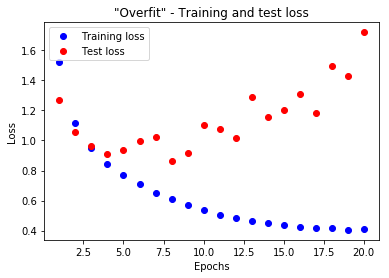

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('\"Overfit\" - Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

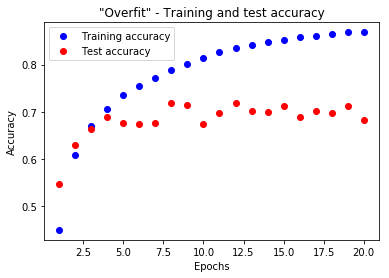

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('\"Overfit\" - Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#"Underfit" Model

##Build the "Underfit" Model

In [0]:
model = tf.keras.Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=train_images.shape[1:]))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

epochs = 4
batch_size = 64
history = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_data=(test_images,test_labels))


Train on 50000 samples, validate on 10000 samples
Epoch 1/4
50000/50000 [==============================] - 40s 809us/sample - loss: 1.6385 - acc: 0.4197 - val_loss: 1.4841 - val_acc: 0.4751
Epoch 2/4
50000/50000 [==============================] - 37s 750us/sample - loss: 1.3080 - acc: 0.5403 - val_loss: 1.2522 - val_acc: 0.5592
Epoch 3/4
50000/50000 [==============================] - 37s 745us/sample - loss: 1.1913 - acc: 0.5841 - val_loss: 1.2603 - val_acc: 0.5451
Epoch 4/4
50000/50000 [==============================] - 37s 747us/sample - loss: 1.1095 - acc: 0.6142 - val_loss: 1.2091 - val_acc: 0.5799


##Evaluate "Underfit" Accuracy

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 3s 345us/sample - loss: 1.2091 - acc: 0.5799
('Test accuracy:', 0.5799)


##"Underfit" Training/test loss/accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

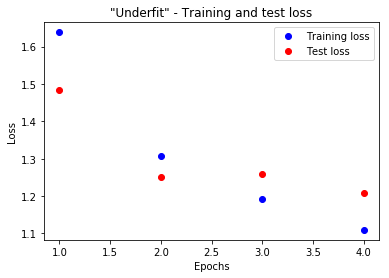

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('\"Underfit\" - Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

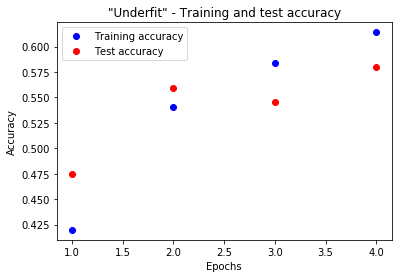

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('\"Underfit\" - Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#"Just Right" Model

##Build the "Just Right" Model

In [0]:
model = tf.keras.Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=train_images.shape[1:]))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

epochs = 10
batch_size = 32
history = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_data=(test_images,test_labels))


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 83s 2ms/sample - loss: 1.7092 - acc: 0.3788 - val_loss: 1.3005 - val_acc: 0.5218
Epoch 2/10
50000/50000 [==============================] - 80s 2ms/sample - loss: 1.3623 - acc: 0.5231 - val_loss: 1.2638 - val_acc: 0.5563
Epoch 3/10
50000/50000 [==============================] - 80s 2ms/sample - loss: 1.2325 - acc: 0.5749 - val_loss: 1.0636 - val_acc: 0.6309
Epoch 4/10
50000/50000 [==============================] - 80s 2ms/sample - loss: 1.1669 - acc: 0.6027 - val_loss: 1.0506 - val_acc: 0.6477
Epoch 5/10
50000/50000 [==============================] - 80s 2ms/sample - loss: 1.1427 - acc: 0.6168 - val_loss: 1.0165 - val_acc: 0.6515
Epoch 6/10
50000/50000 [==============================] - 81s 2ms/sample - loss: 1.1510 - acc: 0.6189 - val_loss: 1.0941 - val_acc: 0.6276
Epoch 7/10
50000/50000 [==============================] - 79s 2ms/sample - loss: 1.1677 - acc: 0.6163 - val_loss: 1.

##Evaluate "Just Right" Accuracy

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 5s 510us/sample - loss: 1.2435 - acc: 0.5664
('Test accuracy:', 0.5664)


##"Just Right" Training/test loss/accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

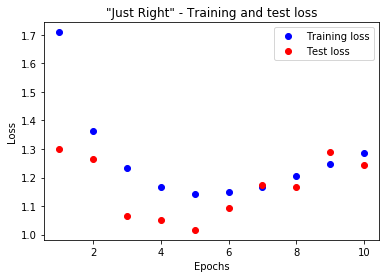

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('\"Just Right\" - Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

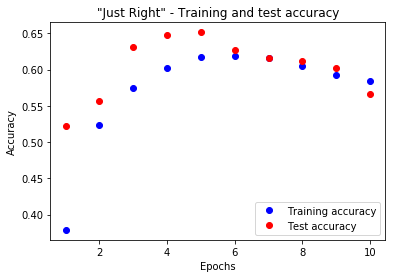

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('\"Just Right\" - Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()